In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpcsc import multipathcsc  # our library

## Load data

In [2]:
data = np.load("example_data.npz")
signal = data["signal"]
dictionary = data["dictionary"]

print(f"{signal.shape = } (n_samples, n_dims)")
print(f"{dictionary.shape = } (n_atoms, n_samples_atom, n_dims)")

signal.shape = (2000, 1) (n_samples, n_dims)
dictionary.shape = (143, 512, 1) (n_atoms, n_samples_atom, n_dims)


## Convolution sparse coding with multipath

In [3]:
# This line is long to execute the first time, because code is compiled.
approx, time_idxs, atom_idxs, vals, path = multipathcsc(signal=signal, dictionary=dictionary, n_atoms_to_find=3, n_paths=5)
print(f"The best solution was obtained with path {path}.")

The best solution was obtained with path [1 0 0].


- `approx` contains the best approximation of `signal`.
- `time_idxs` contains the time indexes of the selected atoms.
- `atom_idxs` contains the indexes of the selected atoms.
- `vals` contains the multiplicative factors to scale the atoms (which have unit norm).
- `path` is the path of the best solution.

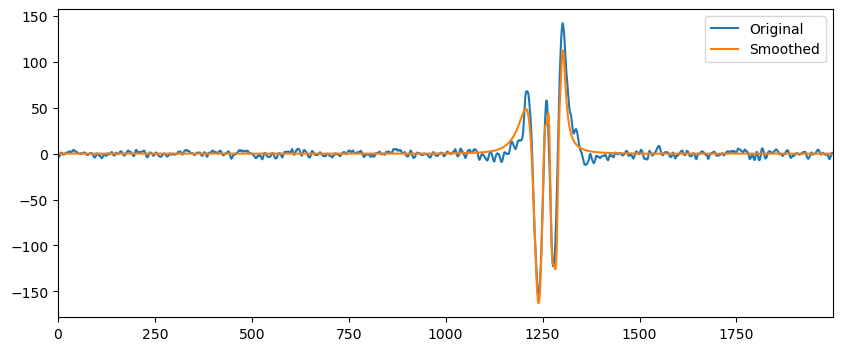

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(signal, label="Original")
ax.plot(approx, label="Smoothed")
plt.legend()
ax.set_xmargin(0)

## Decomposition

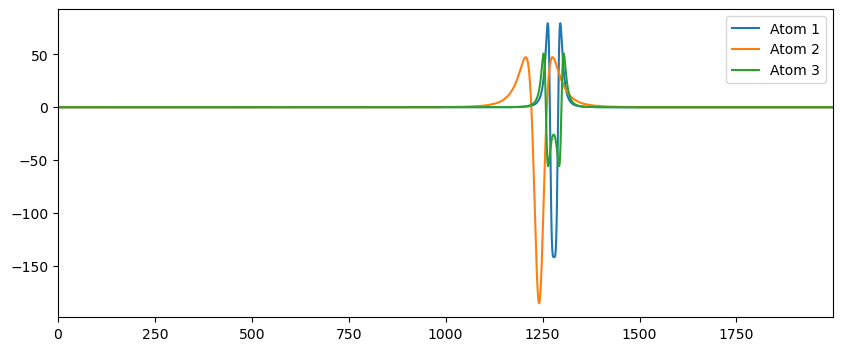

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
# ax.plot(signal, label="Original")
ax.set_xmargin(0)
n_samples_atom = dictionary.shape[1]
for k_atom in range(time_idxs.size):
    approx_single_atom = np.zeros_like(signal)
    start = time_idxs[k_atom]
    end = start + n_samples_atom
    atom = dictionary[atom_idxs[k_atom]]
    val = vals[k_atom]
    approx_single_atom[start:end] = val * atom
    ax.plot(approx_single_atom, label=f"Atom {k_atom+1}")
plt.legend()